<a href="https://colab.research.google.com/github/NgaAdrain/TEAM_Enter_Text_Here/blob/master/Data_Varification/20200824_Deep_Learning_Model_4_Sim2Real_With_MIXED_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1>**Deep Learning With CNN & DNN**</h1>

##**Module Import**


In [1]:
# Import the TensorFlow
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

https://tykimos.github.io/2017/06/10/Model_Save_Load/
<br>
모델 저장 및 가중치 저장 & 불러와서 사용하기

##**File Read**

###<h2>학습용 데이터 읽기 train_input.csv의 형식으로 저장한다</h2>

In [2]:
train_file = pd.read_csv('/content/train_input.csv',encoding='utf-8')
train_file_label = train_file.pop('Label')
train_file.drop(['Timestamp','Winker(left)','Winker(right)','Timecheck'],axis = 'columns',inplace = True)

###<h2>시뮬레이션 테스트 데이터는 test_input.csv의 형식으로 저장한다.</h2>

In [3]:
test_file = pd.read_csv('/content/test_data.csv',encoding='utf-8')
test_file_time = test_file.pop('Timestamp')
test_file_label = test_file.pop('Label')
test_file.drop(['Winker(left)','Winker(right)','Timecheck'],axis = 'columns',inplace = True)

###<h2>실제 데이터는 real_data.csv의 형식으로 저장한다.</h2>

In [4]:
real_file = pd.read_csv('/content/real_data.csv',encoding='utf-8')
real_file_label = real_file.pop('Label')

##**DataFrame 2 Numpy Array**


###<h2>학습용 데이터 변환</h2>

In [5]:
train_array = np.delete(train_file.values,-1,0).astype(np.float)
train_label = np.delete(train_file_label.values,-1,0).astype(np.int)

###<h2>테스트 데이터 변환</h2>


In [6]:
test_array = np.delete(test_file.values,-1,0).astype(np.float)
test_label = np.delete(test_file_label.values,-1,0).astype(np.int)
test_time = np.delete(test_file_time.values,-1,0)

###<h2>실제 데이터 변환</h2>

In [7]:
real_array = np.delete(real_file.values,-1,0).astype(np.float)
real_label = np.delete(real_file_label.values,-1,0).astype(np.int)

###<h2>30Hz->10Hz로 데이터 갯수 맞추기</h2>

형진이가 만든 10hz변환기를 통과한 학습용 파일에는 필요가 없다!

=> 30Hz로 부터 10Hz의 데이터 3개를 뽑아낸다!

####<h3>학습용 데이터</h3>

In [8]:
train_10hz_array = []
train_10hz_label = []
count = 0
for temp in train_array:
  if(count%3 == 1):
    train_10hz_array.append(train_array[count,:])
    train_10hz_label.append(train_label[count])
  count = count + 1
count = 0
for temp in train_array:
  if(count%3 == 0):
    train_10hz_array.append(train_array[count,:])
    train_10hz_label.append(train_label[count])
  count = count + 1
count = 0
for temp in train_array:
  if(count%3 == 2):
    train_10hz_array.append(train_array[count,:])
    train_10hz_label.append(train_label[count])
  count = count + 1
train_array = np.array(train_10hz_array)
train_label = np.array(train_10hz_label)
print(len(train_array))
print(len(train_label))

312145
312145


####<h3>테스트 데이터</h3>

In [9]:
test_10hz_array = []
test_10hz_label = []
count = 0
for temp in test_array:
  if(count%3 == 1):
    test_10hz_array.append(test_array[count,:])
    test_10hz_label.append(test_label[count])
  count = count + 1
count = 0
for temp in test_array:
  if(count%3 == 0):
    test_10hz_array.append(test_array[count,:])
    test_10hz_label.append(test_label[count])
  count = count + 1
count = 0
for temp in test_array:
  if(count%3 == 2):
    test_10hz_array.append(test_array[count,:])
    test_10hz_label.append(test_label[count])
  count = count + 1
test_array = np.array(test_10hz_array)
test_label = np.array(test_10hz_label)
#print(test_array)
print(len(test_label))

18098


###<h2>데이터 길이</h2>

In [11]:
length_test = int(len(test_array)/25)
length_train = int(len(train_array)/25)
length_real = int(len(real_array)/25)

##<h2>데이터 정규화</h2>

###<h3>사용 상수</h3>

In [10]:
VELOCITY = 0
ACCEL_X = 1
ROT_Z = 2
STEERING = 3 
ACCEL = 4
BRAKE = 5
NOR_MAX = 31.75
NOR_MIN = -32
VELOCITY_MAX = 100
VELOCITY_MIN = 0
ACCEL_X_MAX =  1.5
ACCEL_X_MIN = -1.5
ROT_Z_MAX = 45
ROT_Z_MIN = -45
STEERING_MAX = 250
STEERING_MIN = -225
ACCEL_MAX = 70
ACCEL_MIN = 0
BRAKE_MAX = 50
BRAKE_MIN = 0

### <h3> Rotate_Z 부호 바꾸기 </h3>
(부호처리된 파일로 부터 나온것은 할 필요 X)

In [11]:
for i in range(len(train_array)):
  #train_array[i][VELOCITY] = train_array[i][VELOCITY] / 2
  #train_array[i][ACCEL_X] = train_array[i][ACCEL_X] / 2
  train_array[i][ROT_Z] = -1 * train_array[i][ROT_Z]
for i in range(len(test_array)):
  test_array[i][ROT_Z] = -1 * test_array[i][ROT_Z]
  #test_array[i][VELOCITY] = test_array[i][VELOCITY] / 2
  #test_array[i][ACCEL_X] = test_array[i][ACCEL_X] / 2

###<h3> Z-SCORE 표준화 작업 </h3>

Z-Score : Value(값) - Mean(평균) / Standard Deviation(표준 편차)

In [12]:
#Z-Score Standardization
train_mean = np.mean(train_array,axis = 0)
train_std = np.std(train_array,axis = 0)
test_mean = np.mean(test_array,axis = 0)
test_std = np.std(test_array,axis = 0)
real_mean = np.mean(real_array,axis = 0)
real_std = np.std(real_array,axis = 0)
train = (train_array - train_mean)/train_std
test = (test_array - test_mean)/test_std
real = (real_array - real_mean)/real_std

###<h3> -1 ~ 1 정규화 작업 </h3>

In [13]:
norm = np.concatenate((train,test,real), axis=0).max(axis=0)
train = train / norm
test = test / norm
real = real / norm

##**데이터셋 만들기**

###<h1>사용 상수</h1>

In [14]:
#초당 32개의 데이터가 나옴.(30~32Hz) => 10Hz 획일화함.
WINDOW_SIZE = 48 #4.8초 분량

###<h2>Convolution Neural Network Dataset</h2>

####<h3>학습용 데이터셋</h3>

In [15]:
#30hz
train_dataset_data = []
train_dataset_label = []
for i in range(WINDOW_SIZE, train_array.shape[0] + 1, 1):
  train_dataset_data.append(train_array[i-WINDOW_SIZE:i])
  train_dataset_label.append(train_label[i-1])
#for i in range(WINDOW_SIZE, train.shape[0] + 1, 1):
#  train_dataset_data.append(train[i-WINDOW_SIZE:i])
#  train_dataset_label.append(train_label[i-1])
tr_data = np.array(train_dataset_data)
tr_label = np.array(train_dataset_label) 

print(tr_data.shape)
print(tr_label.shape)

(312098, 48, 6)
(312098,)


####<h3>테스트 데이터셋</h3>

In [16]:
#30hz
test_dataset_data = []
test_dataset_label = []
for i in range(WINDOW_SIZE, test_array.shape[0] + 1, 1):
  test_dataset_data.append(test_array[i-WINDOW_SIZE:i])
  test_dataset_label.append(test_label[i-1])
#for i in range(WINDOW_SIZE, test.shape[0] + 1, 1):
#  test_dataset_data.append(test[i-WINDOW_SIZE:i])
#  test_dataset_label.append(test_label[i-1])
te_data = np.array(test_dataset_data)
te_label = np.array(test_dataset_label) 
print(te_data.shape)

(18051, 48, 6)


####<h3>실제 데이터셋</h3>

In [17]:
real_dataset_data = []
real_dataset_label = []
for i in range(WINDOW_SIZE, real_array.shape[0] + 1, 1):
  real_dataset_data.append(real_array[i-WINDOW_SIZE:i])
  real_dataset_label.append(real_label[i-1])
#for i in range(WINDOW_SIZE, real.shape[0] + 1, 1):
#  real_dataset_data.append(real[i-WINDOW_SIZE:i])
#  real_dataset_label.append(real_label[i-1])
re_data = np.array(real_dataset_data)
re_label = np.array(real_dataset_label) 
print(re_data.shape)

(53214, 48, 6)


####각 데이터 셋 array에 차원을 추가

In [18]:
##여기 구현
##TO DO: data의 구조를 (None,총 column 수, WINDOW크기, 라벨수)로 바꿔야함. 4차원으로 변경
tr_c_data = tr_data.reshape(-1,6,WINDOW_SIZE,1)
te_c_data = te_data.reshape(-1,6,WINDOW_SIZE,1)
re_c_data = re_data.reshape(-1,6,WINDOW_SIZE,1)
print(tr_c_data.shape)

(312098, 6, 48, 1)


##**상태 분석 모델링**

###<h2>Convolution Neural Network Model</h2>

Convolution neural Network에서 합성곱 신경망의 필터를 통과할 때(Conv2D-> 2차원 필터) 데이터는 차원이 낮아지게 된다.<br>
NxN의 vector가 FxF의 필터를 통과하게되면 (N-F+1)x(N-F+1)로 줄어들게 된다.<br>
즉 지금 여기의 예시에서는 120(윈도우 크기) x 5를 3x3이 통과하게 되면 118 x 3으로 줄어든다.<br>
이를 MaxPool2D의 2x2필터를 통과하게 되면 117x2로 줄어들게 되며 다시한번 Conv2D의 2x2 필터를 통과하게 되면 116x1로 줄어들어서 더이상 Convolution필터를 통과할 수 없게 된다.<br>
이 때문에 많은 필터 layer를 추가하지 못하므로 이를 해결하기위해 padding 기술을 사용한다.<br>
padding기술은 각 edge의 값을 복사하여 각 방향으로 한 칸 늘려서 크기를 유지하는 기술이다.<br>
Conv2D에서는 padding을 사용하지 않는 valid, padding을 사용하는 same의 두가지를 지원한다. 이를 사용하면 많은 layer를 넣을 수 있다. 이를 이용하여 해결하였다.

MAX_POOLING vs CONV2D STRIDE옵션

FLATTEN vs GAP(Global Average Pooling)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 6, 48, 16)         160       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 6, 24, 32)         4640      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 6, 24, 32)         9248      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 6, 12, 64)         18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 6, 12, 64)         36928     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 6, 6, 128)         73856     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 6, 6, 128)        

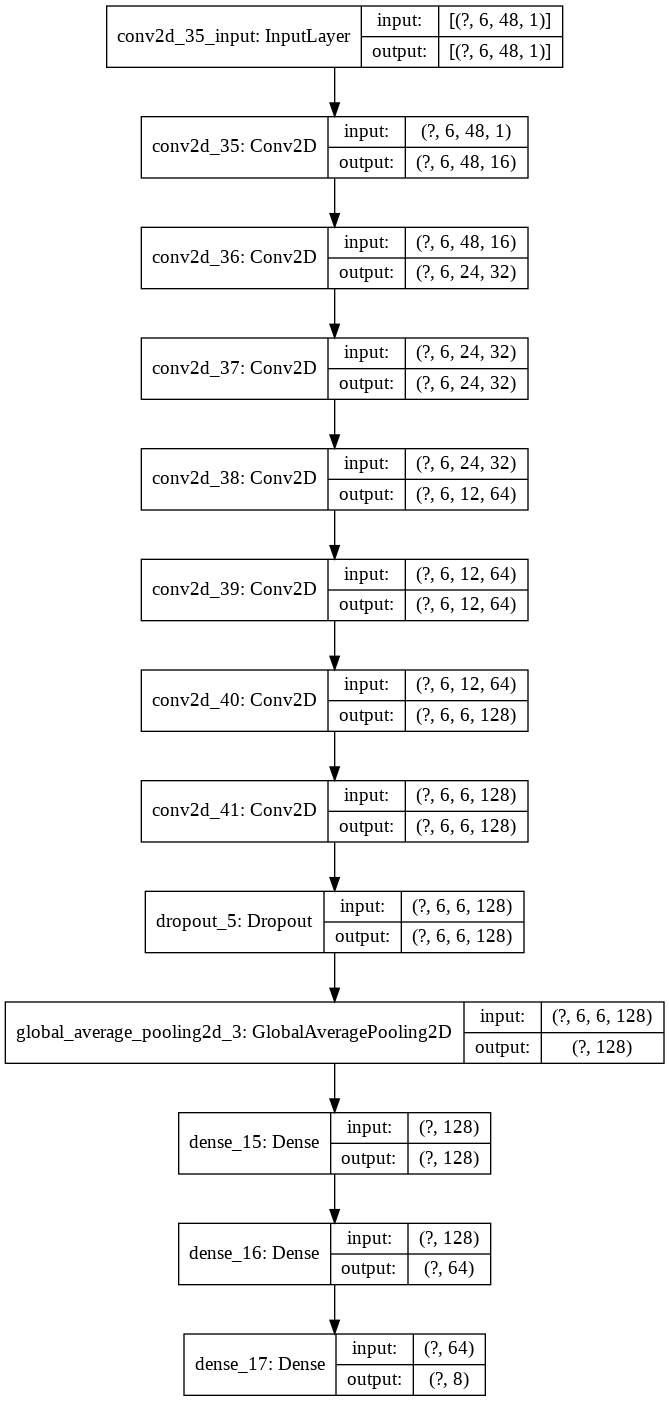

In [42]:
cnn_model_main = keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu',input_shape = (6,WINDOW_SIZE,1)), # 전 단계 필터 수의 2배인 240개의 3x3 matrix filters
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(32,3,strides=(1,2),padding='same',activation='relu'),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'), # 전 단계 필터 수의 1/2배인 120개의 3x3 matrix filters
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(64,3,strides=(1,2),padding='same',activation='relu'),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.Conv2D(128,3,strides=(1,2),padding='same',activation='relu'),
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    keras.layers.Dropout(0.2),
    keras.layers.GlobalAveragePooling2D(),
    #keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(8, activation='softmax')  #stop 빼는 경우
])
cnn_model_main.summary()
cnn_model_main.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tf.keras.utils.plot_model(cnn_model_main, show_shapes=True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 6, 48, 16)         160       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 6, 24, 32)         4640      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 6, 24, 32)         9248      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 6, 12, 64)         18496     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 6, 12, 64)         36928     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 6, 6, 128)         73856     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 6, 6, 128)        

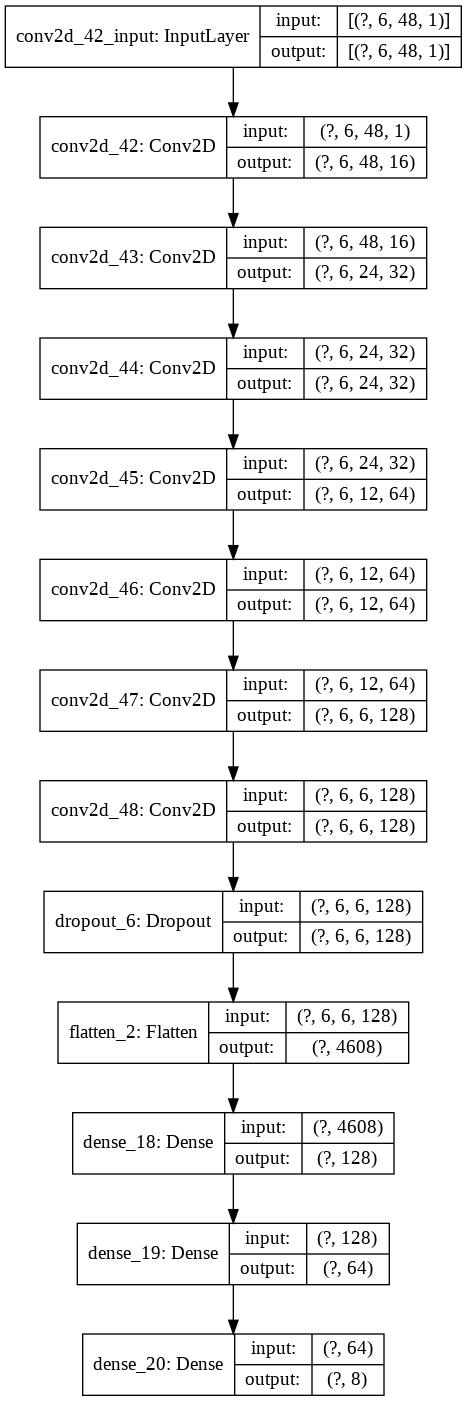

In [43]:
cnn_model_sub = keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu',input_shape = (6,WINDOW_SIZE,1)), # 전 단계 필터 수의 2배인 240개의 3x3 matrix filters
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(32,3,strides=(1,2),padding='same',activation='relu'),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'), # 전 단계 필터 수의 1/2배인 120개의 3x3 matrix filters
    #keras.layers.Dropout(0.2),
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(64,3,strides=(1,2),padding='same',activation='relu'),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.Conv2D(128,3,strides=(1,2),padding='same',activation='relu'),
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    keras.layers.Dropout(0.3),
    #keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(8, activation='softmax')  #stop 빼는 경우
])
cnn_model_sub.summary()
cnn_model_sub.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tf.keras.utils.plot_model(cnn_model_sub, show_shapes=True)

###CNN MODEL 학습

In [46]:
model_checkpoint_callback_1 = keras.callbacks.ModelCheckpoint(
    filepath= '/content',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)
model_checkpoint_callback_2 = keras.callbacks.ModelCheckpoint(
    filepath= '/content/sample_data',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [47]:
cnn_history_1 = cnn_model_main.fit(tr_c_data , tr_label , epochs=20, batch_size=64, callbacks = [model_checkpoint_callback_1], validation_data=(re_c_data, re_label))

Epoch 1/20
4877/4877 [==============================] - 26s 5ms/step - loss: 0.0883 - accuracy: 0.9681 - val_loss: 0.8897 - val_accuracy: 0.8653
Epoch 2/20
4877/4877 [==============================] - 26s 5ms/step - loss: 0.0732 - accuracy: 0.9740 - val_loss: 0.8367 - val_accuracy: 0.8665
Epoch 3/20
4877/4877 [==============================] - 26s 5ms/step - loss: 0.0615 - accuracy: 0.9780 - val_loss: 1.0268 - val_accuracy: 0.8673
Epoch 4/20
4877/4877 [==============================] - 26s 5ms/step - loss: 0.0545 - accuracy: 0.9808 - val_loss: 0.8873 - val_accuracy: 0.8653
Epoch 5/20
4877/4877 [==============================] - 27s 5ms/step - loss: 0.0514 - accuracy: 0.9823 - val_loss: 0.8145 - val_accuracy: 0.8772
Epoch 6/20
4877/4877 [==============================] - 26s 5ms/step - loss: 0.0462 - accuracy: 0.9838 - val_loss: 1.0459 - val_accuracy: 0.8667
Epoch 7/20
4877/4877 [==============================] - 26s 5ms/step - loss: 0.0449 - accuracy: 0.9845 - val_loss: 0.9316 - val_ac

In [48]:
cnn_history_2 = cnn_model_sub.fit(tr_c_data , tr_label , epochs=20 , batch_size=64, callbacks = [model_checkpoint_callback_2], validation_data=(te_c_data, te_label))

Epoch 1/20
4877/4877 [==============================] - 25s 5ms/step - loss: 0.2794 - accuracy: 0.9002 - val_loss: 0.8991 - val_accuracy: 0.7729
Epoch 2/20
4877/4877 [==============================] - 24s 5ms/step - loss: 0.1360 - accuracy: 0.9504 - val_loss: 0.8946 - val_accuracy: 0.8079
Epoch 3/20
4877/4877 [==============================] - 24s 5ms/step - loss: 0.1033 - accuracy: 0.9629 - val_loss: 1.1414 - val_accuracy: 0.7721
Epoch 4/20
4877/4877 [==============================] - 24s 5ms/step - loss: 0.0893 - accuracy: 0.9685 - val_loss: 1.3626 - val_accuracy: 0.7551
Epoch 5/20
4877/4877 [==============================] - 24s 5ms/step - loss: 0.0818 - accuracy: 0.9713 - val_loss: 1.4731 - val_accuracy: 0.7406
Epoch 6/20
4877/4877 [==============================] - 24s 5ms/step - loss: 0.0759 - accuracy: 0.9737 - val_loss: 1.2871 - val_accuracy: 0.8113
Epoch 7/20
4877/4877 [==============================] - 24s 5ms/step - loss: 0.0731 - accuracy: 0.9752 - val_loss: 1.6305 - val_ac

##<h2>**모델 예측**</h2>

###CNN 예측

In [50]:
cnn_test_predictions_1 = cnn_model_main.predict(te_c_data)
cnn_test_predictions_2 = cnn_model_sub.predict(te_c_data)
cnn_real_predictions_1 = cnn_model_main.predict(re_c_data)
cnn_real_predictions_2 = cnn_model_sub.predict(re_c_data)

In [51]:
cnn_model_main.load_weights('/content')
cnn_model_sub.load_weights('/content/sample_data')
cnn_test_predictions_3 = cnn_model_main.predict(te_c_data)
cnn_test_predictions_4 = cnn_model_sub.predict(te_c_data)
cnn_real_predictions_3 = cnn_model_main.predict(re_c_data)
cnn_real_predictions_4 = cnn_model_sub.predict(re_c_data)

####Model Merge

In [52]:
print(type(cnn_test_predictions_1))
count = 0
cnn_test_predictions = []
for main_pred in cnn_test_predictions_1:
  if 0 < np.argmax(cnn_test_predictions_2[count]) < 5:
    cnn_test_predictions.append(np.argmax(cnn_test_predictions_2[count]))
  else:
    cnn_test_predictions.append(np.argmax(main_pred))
  count = count + 1
cnn_test_predictions = np.array(cnn_test_predictions)

<class 'numpy.ndarray'>


In [53]:
print(type(cnn_real_predictions_1))
count = 0
cnn_real_predictions = []
for main_pred in cnn_real_predictions_1:
  if 0 < np.argmax(cnn_real_predictions_2[count]) < 5:
    cnn_real_predictions.append(np.argmax(cnn_real_predictions_2[count]))
  else:
    cnn_real_predictions.append(np.argmax(main_pred))
  count = count + 1
cnn_real_predictions = np.array(cnn_real_predictions)

<class 'numpy.ndarray'>


In [56]:
print(type(cnn_test_predictions_3))
count = 0
cnn_test_predictions_5 = []
for main_pred in cnn_test_predictions_3:
  if 0 < np.argmax(cnn_test_predictions_4[count]) < 5:
    cnn_test_predictions_5.append(np.argmax(cnn_test_predictions_4[count]))
  else:
    cnn_test_predictions_5.append(np.argmax(main_pred))
  count = count + 1
cnn_test_predictions_5 = np.array(cnn_test_predictions_5)

<class 'numpy.ndarray'>


In [57]:
print(type(cnn_real_predictions_3))
count = 0
cnn_real_predictions_5 = []
for main_pred in cnn_real_predictions_3:
  if 0 < np.argmax(cnn_real_predictions_4[count]) < 5:
    cnn_real_predictions_5.append(np.argmax(cnn_real_predictions_4[count]))
  else:
    cnn_real_predictions_5.append(np.argmax(main_pred))
  count = count + 1
cnn_real_predictions_5 = np.array(cnn_real_predictions_5)

<class 'numpy.ndarray'>


####cnn 테스트 데이터

In [35]:
from sklearn.metrics import confusion_matrix

In [58]:
matrix = confusion_matrix(te_label, cnn_test_predictions)#_2.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[8319  525  486  103  110  485  418   17]
 [ 139 1697    0   85    1   51   28    0]
 [ 230    0 1726   33  171    0   17    3]
 [  32   41    0  501    0   16    2    0]
 [ 122    0   24    2 1100    2    9    0]
 [ 209   78   19   16    0  196   10    0]
 [  52   55  125    0    0   13  201    0]
 [   3   27    0    3    0    0    0  549]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[79  5  4  0  1  4  3  0]
 [ 6 84  0  4  0  2  1  0]
 [10  0 79  1  7  0  0  0]
 [ 5  6  0 84  0  2  0  0]
 [ 9  0  1  0 87  0  0  0]
 [39 14  3  3  0 37  1  0]
 [11 12 28  0  0  2 45  0]
 [ 0  4  0  0  0  0  0 94]]


In [59]:
matrix = confusion_matrix(te_label, cnn_test_predictions_1.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[8783  268  331   55   49  495  461   21]
 [ 334 1462    0   48    0  127   28    2]
 [ 342    0 1651   39   98    9   38    3]
 [  45   39    0  487    0   18    3    0]
 [ 143    0   48    0 1041    7   20    0]
 [ 267   19   10   26    0  196   10    0]
 [  64   15  113    0    0   13  241    0]
 [   3    2    0    0    0    0    0  577]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[83  2  3  0  0  4  4  0]
 [16 73  0  2  0  6  1  0]
 [15  0 75  1  4  0  1  0]
 [ 7  6  0 82  0  3  0  0]
 [11  0  3  0 82  0  1  0]
 [50  3  1  4  0 37  1  0]
 [14  3 25  0  0  2 54  0]
 [ 0  0  0  0  0  0  0 99]]


In [60]:
matrix = confusion_matrix(te_label, cnn_test_predictions_2.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[8375  525  388   82   83  643  361    6]
 [ 195 1561    0   60    1  123   61    0]
 [ 259    0 1643   23  134   19  102    0]
 [  52   41    0  479    0   20    0    0]
 [ 121    0   24    2 1071   25   16    0]
 [ 183   77   16   11    0  229   12    0]
 [  76   55  112    0    0    7  196    0]
 [  29   27    0    3    0    0    0  523]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[80  5  3  0  0  6  3  0]
 [ 9 78  0  2  0  6  3  0]
 [11  0 75  1  6  0  4  0]
 [ 8  6  0 80  0  3  0  0]
 [ 9  0  1  0 85  1  1  0]
 [34 14  3  2  0 43  2  0]
 [17 12 25  0  0  1 43  0]
 [ 4  4  0  0  0  0  0 89]]


####cnn Callback 테스트 데이터

In [64]:
matrix = confusion_matrix(te_label, cnn_test_predictions_5)#_2.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[7665  585  407  156   77 1122  410   41]
 [  71 1701    0  124    0   37   68    0]
 [ 173    0 1674   47  199   14   66    7]
 [  41   37    0  497    0   15    2    0]
 [  96    0   61   25 1042    9   26    0]
 [ 108   82   16   47    4  251   18    2]
 [  53   17  128    1    0   10  237    0]
 [   6    4    0    0    1    0    0  571]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[73  5  3  1  0 10  3  0]
 [ 3 85  0  6  0  1  3  0]
 [ 7  0 76  2  9  0  3  0]
 [ 6  6  0 83  0  2  0  0]
 [ 7  0  4  1 82  0  2  0]
 [20 15  3  8  0 47  3  0]
 [11  3 28  0  0  2 53  0]
 [ 1  0  0  0  0  0  0 98]]


In [65]:
matrix = confusion_matrix(te_label, cnn_test_predictions_3.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[7761  557  358  117   27 1135  466   42]
 [ 117 1604    0   98    0  113   69    0]
 [ 296    0 1497   39  202   15  124    7]
 [  54   45    0  471    0   16    6    0]
 [ 105    0   67   20 1006    9   52    0]
 [ 119   87   15   14    4  254   33    2]
 [  76   15  104    0    0   10  241    0]
 [   7    0    0    0    0    0    0  575]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[74  5  3  1  0 10  4  0]
 [ 5 80  0  4  0  5  3  0]
 [13  0 68  1  9  0  5  0]
 [ 9  7  0 79  0  2  1  0]
 [ 8  0  5  1 79  0  4  0]
 [22 16  2  2  0 48  6  0]
 [17  3 23  0  0  2 54  0]
 [ 1  0  0  0  0  0  0 98]]


In [66]:
matrix = confusion_matrix(te_label, cnn_test_predictions_4.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[9022  326  221   75   67  375  352   25]
 [ 332 1491    0   63    0   51   64    0]
 [ 273    0 1574   38  187   21   85    2]
 [  51   35    0  481    0   25    0    0]
 [ 141    0   59    8 1018   20   13    0]
 [ 189   56    4   42    0  237    0    0]
 [  76    7  101    1    0    9  252    0]
 [   7    4    0    0    1    0    0  570]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[86  3  2  0  0  3  3  0]
 [16 74  0  3  0  2  3  0]
 [12  0 72  1  8  0  3  0]
 [ 8  5  0 81  0  4  0  0]
 [11  0  4  0 80  1  1  0]
 [35 10  0  7  0 44  0  0]
 [17  1 22  0  0  2 56  0]
 [ 1  0  0  0  0  0  0 97]]


####cnn 실제 데이터

In [61]:
matrix = confusion_matrix(re_label, cnn_real_predictions)#_2.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22351    48    86   116   146   123   132   380]
 [ 1683  2129     1   226     2   189     0    13]
 [ 1006     0  1540     0   392    69   101     1]
 [   95    35     0  1375     3     9     0     3]
 [   17     0     2     2  1515     3     4    24]
 [  501    92     6    67     0   867    38     0]
 [  317     1   114     5   141     6   584     0]
 [  230    18     0    98    85     0     0 16223]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[95  0  0  0  0  0  0  1]
 [39 50  0  5  0  4  0  0]
 [32  0 49  0 12  2  3  0]
 [ 6  2  0 90  0  0  0  0]
 [ 1  0  0  0 96  0  0  1]
 [31  5  0  4  0 55  2  0]
 [27  0  9  0 12  0 50  0]
 [ 1  0  0  0  0  0  0 97]]


In [62]:
matrix = confusion_matrix(re_label, cnn_real_predictions_1.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22520    17    62    56    80   128   137   382]
 [ 2059  1723     2   210     0   233     0    16]
 [ 1145     0  1491     0   294    69   109     1]
 [  128    18     0  1336     0    14     4    20]
 [   55     0     1     2  1465     3     4    37]
 [  531    72     2    30     0   897    39     0]
 [  335     0   151     3    69     6   604     0]
 [  233     4     0   102    82     0     0 16233]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[96  0  0  0  0  0  0  1]
 [48 40  0  4  0  5  0  0]
 [36  0 47  0  9  2  3  0]
 [ 8  1  0 87  0  0  0  1]
 [ 3  0  0  0 93  0  0  2]
 [33  4  0  1  0 57  2  0]
 [28  0 12  0  5  0 51  0]
 [ 1  0  0  0  0  0  0 97]]


In [63]:
matrix = confusion_matrix(re_label, cnn_real_predictions_2.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22467    34    59   101   123   177   196   225]
 [ 1804  1944     0   199     2   275     0    19]
 [ 1185     0  1304     0   367    66   186     1]
 [  111    33     0  1352     3    13     0     8]
 [   27     0     1     0  1490     1     8    40]
 [  502    65     4    57     0   911    32     0]
 [  238     1    26     2   118    23   760     0]
 [  282    18     0    93    81     0     0 16180]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[96  0  0  0  0  0  0  0]
 [42 45  0  4  0  6  0  0]
 [38  0 41  0 11  2  5  0]
 [ 7  2  0 88  0  0  0  0]
 [ 1  0  0  0 95  0  0  2]
 [31  4  0  3  0 57  2  0]
 [20  0  2  0 10  1 65  0]
 [ 1  0  0  0  0  0  0 97]]


####cnn Callback 실제 데이터

In [67]:
matrix = confusion_matrix(re_label, cnn_real_predictions_5)#_2.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22190    76    55   104    96   309   211   341]
 [ 1404  2452     4   170     0   198     2    13]
 [ 1110     0  1445     1   326    74   153     0]
 [   92    28     0  1382     3    15     0     0]
 [   47     0     0     2  1493     0     6    19]
 [  420   154     1    76     1   855    64     0]
 [  214     4   118     0   131     8   693     0]
 [  238    18     0   104   100     0     0 16194]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[94  0  0  0  0  1  0  1]
 [33 57  0  4  0  4  0  0]
 [35  0 46  0 10  2  4  0]
 [ 6  1  0 90  0  0  0  0]
 [ 2  0  0  0 95  0  0  1]
 [26  9  0  4  0 54  4  0]
 [18  0 10  0 11  0 59  0]
 [ 1  0  0  0  0  0  0 97]]


In [68]:
matrix = confusion_matrix(re_label, cnn_real_predictions_3.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22239    70    50    86    63   316   215   343]
 [ 1441  2356     1   196     1   233     2    13]
 [ 1199     0  1386     1   266    74   183     0]
 [  128    16     0  1350     0    22     1     3]
 [   85     0     0     0  1456     0     6    20]
 [  439    84     1    40     1   942    64     0]
 [  220     4   142     0    46     8   748     0]
 [  241    18     0   105    89     0     0 16201]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[95  0  0  0  0  1  0  1]
 [33 55  0  4  0  5  0  0]
 [38  0 44  0  8  2  5  0]
 [ 8  1  0 88  0  1  0  0]
 [ 5  0  0  0 92  0  0  1]
 [27  5  0  2  0 59  4  0]
 [18  0 12  0  3  0 64  0]
 [ 1  0  0  0  0  0  0 97]]


In [69]:
matrix = confusion_matrix(re_label, cnn_real_predictions_4.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22779    28    19    61    82    47    85   281]
 [ 2127  1774     3   132     0   180     3    24]
 [ 1460     0  1132     0   300    64   149     4]
 [  138    20     0  1330     3    27     0     2]
 [   52     0     0     2  1478     1     9    25]
 [  519   122     0    68     0   827    35     0]
 [  271     0    38     0   122     4   733     0]
 [  255     6     0   100   100     0     0 16193]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[97  0  0  0  0  0  0  1]
 [50 41  0  3  0  4  0  0]
 [46  0 36  0  9  2  4  0]
 [ 9  1  0 87  0  1  0  0]
 [ 3  0  0  0 94  0  0  1]
 [33  7  0  4  0 52  2  0]
 [23  0  3  0 10  0 62  0]
 [ 1  0  0  0  0  0  0 97]]
